<a href="https://colab.research.google.com/github/AsmaeKarmouchi/Stateful_Multi_AI_Agents/blob/main/Getting_Started_Langraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 14.6 MB/s eta 0:00:00


In [6]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [7]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')
# print(langsmith)

In [8]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="Langgraph_chatbot"

In [9]:
from langchain_groq import ChatGroq
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c6b00adf4d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c6b00b309b0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))


*   StateGraph : la classe principale pour créer ton graphe d'agents
*   START : nœud de départ (où commence le workflow)
*   END : nœud de fin (où se termine le workflow)

Analogie : Imagine un organigramme avec **START → Agent1 → Agent2 → END**
*  add_messages : fonction spéciale qui ajoute des messages à une liste au lieu de la remplacer
Cruciale pour les chatbots : chaque agent ajoute son message à l'historique
Sans elle, chaque agent écraserait les messages précédents !

In [10]:
from typing import Annotated  # Pour ajouter des métadonnées aux types
from typing_extensions import TypedDict  # Pour créer des dictionnaires typés
from langgraph.graph import StateGraph, START, END  # Pour créer le graphe
from langgraph.graph.message import add_messages  # Pour accumuler les messages


In [11]:
class State(TypedDict):
   #Le State est comme une "mémoire partagée" entre tous les agents.
    #Chaque agent peut lire et modifier cet état.
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)



In [12]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [13]:
graph_builder.add_node("chatbot",chatbot)

In [14]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [15]:
# Cette étape transforme le graphe en une application exécutable
graph=graph_builder.compile()

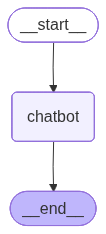

In [16]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: HI
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nHow can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.001212729, 'queue_time': 0.188072924, 'total_time': 0.028485456}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--f1d05851-e1df-40d0-8519-9165b1041946-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋\n\nHow can I help you today? 😄\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 0.001212729, 'queue_time': 0.188072924, 'total_time': 0.028485456}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'fin